In [11]:
import molsysmt as msm
msm.config.set_default_standard_units(standards=['nm', 'ps', 'K', 'mole', 'amu', 'e',
                                      'kcal/mol', 'kcal/(mol*nm**2)', 'N', 'degrees'])

import numpy as np
import matplotlib.pyplot as plt

In [2]:
molecular_system = msm.convert('1TCD', selection='molecule_type=="protein"')

In [3]:
msm.info(molecular_system, element='molecule')

index,name,type,n atoms,n groups,n components,chain index,entity index,entity name
0,Triosephosphate isomerase,protein,1906,248,1,0,0,Triosephosphate isomerase
1,Triosephosphate isomerase,protein,1912,249,1,1,0,Triosephosphate isomerase


In [4]:
molecular_system = msm.build.add_missing_hydrogens(molecular_system, pH=7.4, engine='PDBFixer')

In [5]:
msm.molecular_mechanics.potential_energy_minimization(molecular_system)

In [6]:
msm.molecular_mechanics.get_potential_energy(molecular_system, decomposition=True)

{'HarmonicBondForce': 242.42883977652963 <Unit('kilocalorie / mole')>,
 'PeriodicTorsionForce': 5718.495122789197 <Unit('kilocalorie / mole')>,
 'NonbondedForce': -21103.011472275335 <Unit('kilocalorie / mole')>,
 'CMMotionRemover': 0.0 <Unit('kilocalorie / mole')>,
 'HarmonicAngleForce': 1035.7184036284057 <Unit('kilocalorie / mole')>}

In [7]:
U12 = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='molecule_index==0',
                                                              selection_2='molecule_index==1')

In [8]:
U12

-466.4038225979923 <Unit('kilocalorie / mole')>

In [9]:
%%time
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of molecule_index==0',
                                                              selection_2='all in groups of molecule_index==1')

CPU times: user 5min 11s, sys: 496 ms, total: 5min 11s
Wall time: 5min 12s


/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:709: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


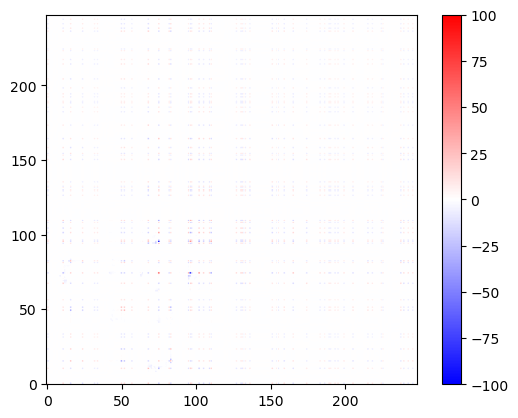

In [12]:
plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-100, vmax=100)
plt.colorbar()
plt.show()

In [13]:
mask = np.absolute(msm.pyunitwizard.get_value(U12_groups))>10.0
np.sum(mask)

510

In [14]:
mask2 = msm.pyunitwizard.get_value(U12_groups)<-10.0
np.sum(mask2)

264

In [15]:
np.sum(U12_groups[mask])/U12

0.7229695330218472 <Unit('dimensionless')>

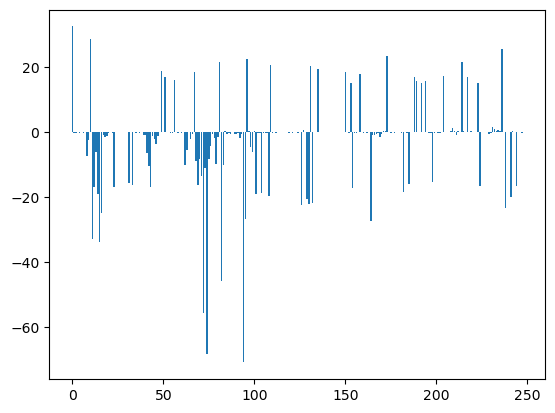

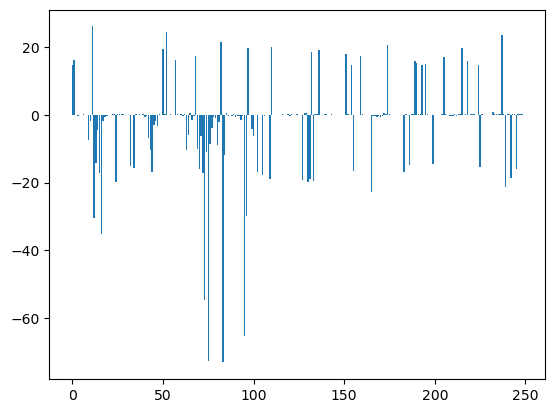

In [16]:
U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

plt.bar(np.arange(U12_1_groups.shape[0]), msm.pyunitwizard.get_value(U12_1_groups))
plt.show()

plt.bar(np.arange(U12_2_groups.shape[0]), msm.pyunitwizard.get_value(U12_2_groups))
plt.show()

In [17]:
distance = msm.structure.get_distances(molecular_system, selection='all in groups of molecule_index==0',
                 selection_2='all in groups of molecule_index==1')

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


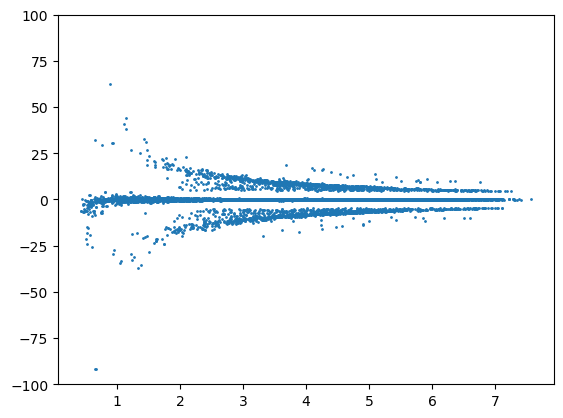

In [18]:
plt.scatter(distance.flatten(), U12_groups.flatten(), s=1.0)
plt.ylim([-100.0, 100.0])
plt.show()

In [19]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

In [20]:
view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all')
msm.thirds.nglview.color_by_value(view, aux, min_value= -max_abs_val, max_value= max_abs_val, cmap='bwr')
view

NGLWidget()